# Analysis of Student's Parental Factors Relationship with Dropout versus Graduation Rates

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# From our Data Directory
from pathlib import Path
data_dir = Path('data')
outputs_dir = Path('outputs')

In [2]:
# Importing all functions/reusable variables from utils.py

from utils import (
    print_counts,
    filter_by_parent_edu,
    filter_one_parent,
    print_percent,
    make_long,
    map_and_order_edu,
    compute_summary_stats,
    compute_percent,
    plot_bar,
    EDU_LABELS,
    EDU_ORDER,
    OUTCOME_PALETTE,
    MEAN_MEDIAN_PALETTE,
    SCHOLARSHIP_PALETTE
)


# Uploading and Cleaning Data

In [3]:
student_data = pd.read_csv(data_dir/'student_data.csv', sep = ';' )

In [4]:
print(student_data.columns)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

#### Clean Student Data

We are going to do an EDA on age at enrollment, debtor (whether the student is going into debt) and admission grade. 
We will then examine their relationship to our target variable (whether the student dropped out or graduated).

In [5]:
clean_sd = student_data[['Previous qualification (grade)','Debtor', 'Age at enrollment', 
                         'Admission grade', 'Target', 'Tuition fees up to date', "Mother's qualification", 
                         "Father's qualification", 'Scholarship holder']]

# Removing the 794 students that are marked as enrolled
clean_sd = clean_sd[clean_sd["Target"] != "Enrolled"]

## Exploring 'Mother's occupation' and 'Father's qualification' for categorization

In [6]:
mothers_quals = sorted(clean_sd["Mother's qualification"].unique())
fathers_quals = sorted(clean_sd["Father's qualification"].unique())

# No 13, 20, 25, 31, 33
print(mothers_quals)

print(fathers_quals)

len(fathers_quals)
# shared_values = set(mothers_quals) & set(fathers_quals)
# shared_values

[1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 14, 18, 19, 22, 26, 27, 29, 30, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
[1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 18, 19, 20, 22, 25, 26, 27, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]


34

In [7]:
allowed_values = {1, 2, 3, 4, 5, 18, 22, 35, 39, 41, 42}

clean_sd_trial = clean_sd[clean_sd["Father's qualification"].isin(allowed_values) & clean_sd["Mother's qualification"].isin(allowed_values)]

In [8]:
clean_sd_trial

,Previous qualification (grade),Debtor,Age at enrollment,Admission grade,Target,Tuition fees up to date,Mother's qualification,Father's qualification,Scholarship holder
1,160.0,0,19,142.5,Graduate,0,1,3,0
8,137.0,0,21,129.3,Graduate,1,1,1,1
13,110.0,0,21,111.8,Graduate,1,1,1,1
20,122.0,0,21,120.3,Graduate,1,1,1,1
31,125.0,0,20,130.0,Graduate,1,42,3,0
...,...,...,...,...,...,...,...,...,...
4403,137.0,0,19,124.8,Graduate,1,1,1,1
4404,133.1,1,28,120.0,Dropout,0,2,1,0
4417,132.0,0,20,133.8,Graduate,1,1,1,1
4419,125.0,0,19,122.2,Graduate,1,1,1,0


In [9]:
# 1 - Secondary Education - 12th Year of Schooling or Eq. 
# 2 - Higher Education - Bachelor's Degree 
# 3 - Higher Education - Degree 
# 4 - Higher Education - Master's 
# 5 - Higher Education - Doctorate 
# 6 - Frequency of Higher Education 
# 9 - 12th Year of Schooling - Not Completed 
# 10 - 11th Year of Schooling - Not Completed 
# 11 - 7th Year (Old) 
# 12 - Other - 11th Year of Schooling 
# 14 - 10th Year of Schooling 
# 18 - General commerce course 
# 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 
# 22 - Technical-professional course 
# 26 - 7th year of schooling 
# 27 - 2nd cycle of the general high school course 
# 29 - 9th Year of Schooling - Not Completed 
# 30 - 8th year of schooling 
# 34 - Unknown 
# 35 - Can't read or write 
# 36 - Can read without having a 4th year of schooling 
# 37 - Basic education 1st cycle (4th/5th year) or equiv. 
# 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 
# 39 - Technological specialization course 
# 40 - Higher education - degree (1st cycle) 
# 41 - Specialized higher studies course 
# 42 - Professional higher technical course 
# 43 - Higher Education - Master (2nd cycle) 
# 44 - Higher Education - Doctorate (3rd cycle)

# -------

# Unknown - 0
# Illiterate - 1
# Some Level of Elementary School Education -  2
# Elemenatary School (Completed) - 3
# Middle School Education (Completed) - 4
# High School (Completed) - 5
# Process of Getting Bachelors - 6
# Completed Bachelors - 7
# Process of Getting Masters - 8
# Completed Masters - 9
# Process of Getting Doctorate - 10
# Completed Doctorate - 11

Categorizing the 34 previous categories into 12 categories to better understand the data.

In [10]:
# Complete data including new codes
data = {
    "Code": [1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 14, 18, 19, 22, 26, 27, 29, 30, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 34,
             13, 20, 25, 31, 33],
    "Original Description": [
        "Secondary Education - 12th Year of Schooling or Eq.",
        "Higher Education - Bachelor's Degree",
        "Higher Education - Degree",
        "Higher Education - Master's",
        "Higher Education - Doctorate",
        "Frequency of Higher Education",
        "12th Year of Schooling - Not Completed",
        "11th Year of Schooling - Not Completed",
        "7th Year (Old)",
        "Other - 11th Year of Schooling",
        "10th Year of Schooling",
        "General commerce course",
        "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
        "Technical-professional course",
        "7th year of schooling",
        "2nd cycle of the general high school course",
        "9th Year of Schooling - Not Completed",
        "8th year of schooling",
        "Can't read or write",
        "Can read without having a 4th year of schooling",
        "Basic education 1st cycle (4th/5th year) or equiv.",
        "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
        "Technological specialization course",
        "Higher education - degree (1st cycle)",
        "Specialized higher studies course",
        "Professional higher technical course",
        "Higher Education - Master (2nd cycle)",
        "Higher Education - Doctorate (3rd cycle)",
        "Unknown",
        "2nd year complementary high school course",
        "Complementary High School Course",
        "Complementary High School Course – not concluded",
        "General Course of Administration and Commerce",
        "Supplementary Accounting and Administration"
    ],
    "Category": [
        "High School (Completed)",
        "Completed Bachelors",
        "Completed Bachelors",
        "Completed Masters",
        "Completed Doctorate",
        "Process of Getting Bachelors",
        "Middle School Education (Completed)",
        "Middle School Education (Completed)",
        "Elementary School (Completed)",
        "Middle School Education (Completed)",
        "Middle School Education (Completed)",
        "Professional Course",
        "Middle School Education (Completed)",
        "Professional Course",
        "Elementary School (Completed)",
        "High School (Completed)",
        "Middle School Education (Completed)",
        "Middle School Education (Completed)",
        "Illiterate",
        "Some Level of Elementary School Education",
        "Elementary School (Completed)",
        "Some Level of Elementary School Education",
        "Professional Course",
        "Process of Getting Bachelors",
        "Process of Getting Masters",
        "Professional Course",
        "Completed Masters",
        "Completed Doctorate",
        "Unknown",
        "Process of Getting Bachelors",
        "Process of Getting Bachelors",
        "Process of Getting Bachelors",
        "High School (Completed)",
        "Professional Course"
    ]
}

# Mapping categories to numeric codes
category_to_code = {
    "Unknown": 0,
    "Illiterate": 1,
    "Some Level of Elementary School Education": 2,
    "Elementary School (Completed)": 3,
    "Middle School Education (Completed)": 4,
    "High School (Completed)": 5,
    "Process of Getting Bachelors": 6,
    "Completed Bachelors": 7,
    "Process of Getting Masters": 8,
    "Completed Masters": 9,
    "Process of Getting Doctorate": 10,
    "Completed Doctorate": 11,
    "Professional Course": 2  # same as Some Level of Elementary or adjust if desired
}

# Create DataFrame
education_df = pd.DataFrame(data)

# Add numeric category codes
education_df["Category_Code"] = education_df["Category"].map(category_to_code)

# Display
education_df

,Code,Original Description,Category,Category_Code
0,1,Secondary Education - 12th Year of Schooling o...,High School (Completed),5
1,2,Higher Education - Bachelor's Degree,Completed Bachelors,7
2,3,Higher Education - Degree,Completed Bachelors,7
3,4,Higher Education - Master's,Completed Masters,9
4,5,Higher Education - Doctorate,Completed Doctorate,11
5,6,Frequency of Higher Education,Process of Getting Bachelors,6
6,9,12th Year of Schooling - Not Completed,Middle School Education (Completed),4
7,10,11th Year of Schooling - Not Completed,Middle School Education (Completed),4
8,11,7th Year (Old),Elementary School (Completed),3
9,12,Other - 11th Year of Schooling,Middle School Education (Completed),4


Now mapping the codes and new categories to our old clean_sd dataframe.

In [11]:
# Create mapping dictionaries
code_to_category = dict(zip(education_df["Code"], education_df["Category"]))
code_to_code = dict(zip(education_df["Code"], education_df["Category_Code"]))

# Map Mother's qualification
clean_sd["Mother_edu_category"] = clean_sd["Mother's qualification"].map(code_to_category)
clean_sd["Mother_edu_code"] = clean_sd["Mother's qualification"].map(code_to_code).fillna(0).astype(int)

# Map Father's qualification
clean_sd["Father_edu_category"] = clean_sd["Father's qualification"].map(code_to_category)
clean_sd["Father_edu_code"] = clean_sd["Father's qualification"].map(code_to_code).fillna(0).astype(int)

# New DF
clean_sd

,Previous qualification (grade),Debtor,Age at enrollment,Admission grade,Target,Tuition fees up to date,Mother's qualification,Father's qualification,Scholarship holder,Mother_edu_category,Mother_edu_code,Father_edu_category,Father_edu_code
0,122.0,0,20,127.3,Dropout,1,19,12,0,Middle School Education (Completed),4,Middle School Education (Completed),4
1,160.0,0,19,142.5,Graduate,0,1,3,0,High School (Completed),5,Completed Bachelors,7
2,122.0,0,19,124.8,Dropout,0,37,37,0,Elementary School (Completed),3,Elementary School (Completed),3
3,122.0,0,20,119.6,Graduate,1,38,37,0,Some Level of Elementary School Education,2,Elementary School (Completed),3
4,100.0,0,45,141.5,Graduate,1,37,38,0,Elementary School (Completed),3,Some Level of Elementary School Education,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,125.0,0,19,122.2,Graduate,1,1,1,0,High School (Completed),5,High School (Completed),5
4420,120.0,1,18,119.0,Dropout,0,1,1,0,High School (Completed),5,High School (Completed),5
4421,154.0,0,30,149.5,Dropout,1,37,37,1,Elementary School (Completed),3,Elementary School (Completed),3
4422,180.0,0,20,153.8,Graduate,1,37,37,1,Elementary School (Completed),3,Elementary School (Completed),3


### Exploring Data

In [12]:
# 139 parents have an unknown level of education
# Students "enrolled" ~ 800

# Dataframe without the 'unknown' category
clean_sd_education = clean_sd[
    (clean_sd["Mother's qualification"] != 34) &
    (clean_sd["Father's qualification"] != 34)
]

clean_sd_education

,Previous qualification (grade),Debtor,Age at enrollment,Admission grade,Target,Tuition fees up to date,Mother's qualification,Father's qualification,Scholarship holder,Mother_edu_category,Mother_edu_code,Father_edu_category,Father_edu_code
0,122.0,0,20,127.3,Dropout,1,19,12,0,Middle School Education (Completed),4,Middle School Education (Completed),4
1,160.0,0,19,142.5,Graduate,0,1,3,0,High School (Completed),5,Completed Bachelors,7
2,122.0,0,19,124.8,Dropout,0,37,37,0,Elementary School (Completed),3,Elementary School (Completed),3
3,122.0,0,20,119.6,Graduate,1,38,37,0,Some Level of Elementary School Education,2,Elementary School (Completed),3
4,100.0,0,45,141.5,Graduate,1,37,38,0,Elementary School (Completed),3,Some Level of Elementary School Education,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,125.0,0,19,122.2,Graduate,1,1,1,0,High School (Completed),5,High School (Completed),5
4420,120.0,1,18,119.0,Dropout,0,1,1,0,High School (Completed),5,High School (Completed),5
4421,154.0,0,30,149.5,Dropout,1,37,37,1,Elementary School (Completed),3,Elementary School (Completed),3
4422,180.0,0,20,153.8,Graduate,1,37,37,1,Elementary School (Completed),3,Elementary School (Completed),3


Previous qualification (grade) & Admission grade is from a scale of 0 - 200



Debtor = 1 means that yes they going into debt



Tuition fees up to date = 1 means that yes they are up to date


Scholarship holder = 1 means that they have a scholarship

In [13]:
num_mom_cat = clean_sd['Mother_edu_category'].value_counts()
num_dad_cat = clean_sd['Father_edu_category'].value_counts()

In [14]:
num_mom_cat

Mother_edu_category
High School (Completed)                      866
Elementary School (Completed)                844
Middle School Education (Completed)          835
Some Level of Elementary School Education    474
Completed Bachelors                          397
Unknown                                      127
Completed Masters                             37
Completed Doctorate                           17
Professional Course                           12
Process of Getting Bachelors                  12
Process of Getting Masters                     6
Illiterate                                     3
Name: count, dtype: int64

In [15]:
num_dad_cat

Father_edu_category
Elementary School (Completed)                1022
Middle School Education (Completed)           836
High School (Completed)                       734
Some Level of Elementary School Education     583
Completed Bachelors                           263
Unknown                                       109
Completed Masters                              34
Professional Course                            20
Completed Doctorate                            16
Process of Getting Bachelors                   10
Illiterate                                      2
Process of Getting Masters                      1
Name: count, dtype: int64

In [16]:
# Functions to explore data

# def print_counts(df, col, label):
#     """
#     Computes the value counts

#     Parameters:
#     - df: DataFrame
#     - col: The column
#     - label: Label to print the value counts

#     Returns:
#     - counts: The value counts Series
#     """
#     counts = df[col].value_counts()

#     print(f"{label} Count")
#     print(counts)
#     print()

#     return counts


# def filter_by_parent_edu(df, mother_code, father_code=None):
#     """
#     Filters the DataFrame based on the education codes

#     Parameters:
#     - df: DataFrame
#     - mother_code: The mother's education code
#     - father_code: The father's education code

#     Returns:
#     - df: DataFrame with the filtered education codes
#     """
#     if father_code is None:
#         father_code = mother_code

#     return df[
#         (df["Mother_edu_code"] == mother_code) &
#         (df["Father_edu_code"] == father_code)
#     ]


# def filter_one_parent(df, parent, parent_code):
#     """
#     Filters the DataFrame based on a single parent's education code

#     Parameters:
#     - df: DataFrame
#     - parent: The parent column to filter for
#     - parent_code: The parent's education code 

#     Returns:
#     - df: DataFrame with the filtered education code
#     """
#     return df[df[parent] == parent_code]


# def print_percent(count_series, parent_label, parent_edu_label, pos_label, neg_label):
#     """
#     Computes and prints percentages from a count Series

#     Parameters:
#     - count_series: Series containing counts (two values expected)
#     - parent_label: The parent you are computing for
#     - parent_edu_label: The parent's education label
#     - pos_label: The label for the first value in the series
#     - neg_label: The label for the second value in the series

#     Returns:
#     - None: Prints out statements of the percentages
#     """
#     total = count_series.iloc[0] + count_series.iloc[1]

#     zero_percent = (count_series.iloc[0] / total) * 100
#     one_percent = (count_series.iloc[1] / total) * 100

#     print(f"Students whose {parent_label} completed {parent_edu_label} and {pos_label}: {zero_percent:.2f}%")
#     print(f"Students whose {parent_label} completed {parent_edu_label} and {neg_label}: {one_percent:.2f}%")
#     print()


## Graduate/Dropout Rates

### Analysis for both parents

In [17]:
# Both Parents must have both codes
clean_sd_elemen_sl = filter_by_parent_edu(clean_sd, 2)
clean_sd_elementary = filter_by_parent_edu(clean_sd, 3)
clean_sd_middle = filter_by_parent_edu(clean_sd, 4)
clean_sd_high = filter_by_parent_edu(clean_sd, 5)
clean_sd_bachelor = filter_by_parent_edu(clean_sd, 7)

In [18]:
# Both Parents Counts for Dropouts & Graduates
elem_sl_count = print_counts(clean_sd_elemen_sl, 'Target', "Elementary School Some Level")
elem_count = print_counts(clean_sd_elementary, 'Target', "Elementary School")
midd_count = print_counts(clean_sd_middle, 'Target', "Middle School")
high_count = print_counts(clean_sd_high, 'Target', "High School")
bach_count = print_counts(clean_sd_bachelor,'Target', "Bachelors")

# Percent Graduated for All Parents
print_percent(elem_sl_count, "parents", "Some Level of Elementary School", "Graduated", "Dropped Out")
print_percent(elem_count,"parents", "Elementary School", "Graduated", "Dropped Out")
print_percent(midd_count,"parents", "Middle School", "Graduated", "Dropped Out")
print_percent(high_count, "parents","High School", "Graduated", "Dropped Out")
print_percent(bach_count, "parents", "their Bachelors", "Graduated", "Dropped Out")

Elementary School Some Level Count
Target
Graduate    130
Dropout      49
Name: count, dtype: int64

Elementary School Count
Target
Graduate    308
Dropout     286
Name: count, dtype: int64

Middle School Count
Target
Graduate    209
Dropout     118
Name: count, dtype: int64

High School Count
Target
Graduate    212
Dropout     132
Name: count, dtype: int64

Bachelors Count
Target
Graduate    76
Dropout     57
Name: count, dtype: int64

Students whose parents completed Some Level of Elementary School and Graduated: 72.63%
Students whose parents completed Some Level of Elementary School and Dropped Out: 27.37%

Students whose parents completed Elementary School and Graduated: 51.85%
Students whose parents completed Elementary School and Dropped Out: 48.15%

Students whose parents completed Middle School and Graduated: 63.91%
Students whose parents completed Middle School and Dropped Out: 36.09%

Students whose parents completed High School and Graduated: 61.63%
Students whose parents co

### Analysis for Mothers

In [19]:
# Moms must have the code
clean_sd_elemen_sl_m = filter_one_parent(clean_sd, "Mother_edu_code", 2)
clean_sd_elementary_m = filter_one_parent(clean_sd, "Mother_edu_code", 3)
clean_sd_middle_m = filter_one_parent(clean_sd, "Mother_edu_code", 4)
clean_sd_high_m = filter_one_parent(clean_sd, "Mother_edu_code", 5)
clean_sd_bachelor_m = filter_one_parent(clean_sd, "Mother_edu_code", 7)

In [20]:
# Grad/Dropout Counts for Mother
elem_sl_m_count = print_counts(clean_sd_elemen_sl_m, 'Target', "Elementary School Some Level (Mother)")
elem_m_count = print_counts(clean_sd_elementary_m, 'Target', "Elementary School (Mother)")
midd_m_count = print_counts(clean_sd_middle_m, 'Target', "Middle School (Mother)")
high_m_count = print_counts(clean_sd_high_m, 'Target', "High School (Mother)")
bach_m_count = print_counts(clean_sd_bachelor_m,'Target',  "Bachelors (Mother)")

# Percent Graduated/Dropped Out for Moms
print_percent(elem_sl_m_count, "Mothers", "Some Level of Elementary School", "Graduated", "Dropped Out")
print_percent(elem_m_count, "Mothers", "Elementary School", "Graduated", "Dropped Out")
print_percent(midd_m_count,"Mothers", "Middle School", "Graduated", "Dropped Out")
print_percent(high_m_count, "Mothers","High School", "Graduated", "Dropped Out")
print_percent(bach_m_count, "Mothers","their Bachelors", "Graduated", "Dropped Out")

Elementary School Some Level (Mother) Count
Target
Graduate    337
Dropout     149
Name: count, dtype: int64

Elementary School (Mother) Count
Target
Graduate    459
Dropout     385
Name: count, dtype: int64

Middle School (Mother) Count
Target
Graduate    532
Dropout     303
Name: count, dtype: int64

High School (Mother) Count
Target
Graduate    565
Dropout     301
Name: count, dtype: int64

Bachelors (Mother) Count
Target
Graduate    238
Dropout     159
Name: count, dtype: int64

Students whose Mothers completed Some Level of Elementary School and Graduated: 69.34%
Students whose Mothers completed Some Level of Elementary School and Dropped Out: 30.66%

Students whose Mothers completed Elementary School and Graduated: 54.38%
Students whose Mothers completed Elementary School and Dropped Out: 45.62%

Students whose Mothers completed Middle School and Graduated: 63.71%
Students whose Mothers completed Middle School and Dropped Out: 36.29%

Students whose Mothers completed High School 

### Analysis for Fathers

In [21]:
# Dads must have the code
clean_sd_elemen_sl_f = filter_one_parent(clean_sd, "Father_edu_code", 2)
clean_sd_elementary_f = filter_one_parent(clean_sd, "Father_edu_code", 3)
clean_sd_middle_f = filter_one_parent(clean_sd, "Father_edu_code", 4)
clean_sd_high_f = filter_one_parent(clean_sd, "Father_edu_code", 5)
clean_sd_bachelor_f = filter_one_parent(clean_sd, "Father_edu_code", 7)

In [22]:
# Grad/Dropout Counts for Fathers
elem_sl_f_count = print_counts(clean_sd_elemen_sl_f, 'Target', "Elementary School Some Level (Father)")
elem_f_count = print_counts(clean_sd_elementary_f, 'Target',"Elementary School (Father)")
midd_f_count = print_counts(clean_sd_middle_f, 'Target',"Middle School (Father)")
high_f_count = print_counts(clean_sd_high_f, 'Target',"High School (Father)")
bach_f_count = print_counts(clean_sd_bachelor_f, 'Target', "Bachelors (Father)")

# Percent Graduated/Dropped Out for Fathers
print_percent(elem_sl_f_count, "Fathers", "Some Level of Elementary School", "Graduated", "Dropped Out")
print_percent(elem_f_count, "Fathers", "Elementary School", "Graduated", "Dropped Out")
print_percent(midd_f_count,"Fathers", "Middle School", "Graduated", "Dropped Out")
print_percent(high_f_count, "Fathers","High School", "Graduated", "Dropped Out")
print_percent(bach_f_count, "Fathers","their Bachelors", "Graduated", "Dropped Out")

Elementary School Some Level (Father) Count
Target
Graduate    417
Dropout     186
Name: count, dtype: int64

Elementary School (Father) Count
Target
Graduate    585
Dropout     437
Name: count, dtype: int64

Middle School (Father) Count
Target
Graduate    550
Dropout     286
Name: count, dtype: int64

High School (Father) Count
Target
Graduate    451
Dropout     283
Name: count, dtype: int64

Bachelors (Father) Count
Target
Graduate    151
Dropout     112
Name: count, dtype: int64

Students whose Fathers completed Some Level of Elementary School and Graduated: 69.15%
Students whose Fathers completed Some Level of Elementary School and Dropped Out: 30.85%

Students whose Fathers completed Elementary School and Graduated: 57.24%
Students whose Fathers completed Elementary School and Dropped Out: 42.76%

Students whose Fathers completed Middle School and Graduated: 65.79%
Students whose Fathers completed Middle School and Dropped Out: 34.21%

Students whose Fathers completed High School 

## Parents' Education Level & Students' Tuition Fees/Debt/Scholarship Status

### Analysis for Both Parents

In [23]:
# Tuition Fees Counts
elem_sl_tuition = print_counts(clean_sd_elemen_sl, 'Tuition fees up to date', "Elementary School Some Level")
elem_tuition = print_counts(clean_sd_elementary, 'Tuition fees up to date', "Elementary School")
midd_tuition = print_counts(clean_sd_middle, 'Tuition fees up to date', "Middle School")
high_tuition = print_counts(clean_sd_high, 'Tuition fees up to date', "High School")
bach_tuition = print_counts(clean_sd_bachelor,'Tuition fees up to date', "Bachelors")


# Percent w Tuition Fees up to date for All Parents
print_percent(elem_sl_tuition, "parents", "Some Level of Elementary School","have Tuition fees up to date", "don't have Tuition fees up to date")
print_percent(elem_tuition,"parents", "Elementary School","have Tuition fees up to date", "don't have Tuition fees up to date")
print_percent(midd_tuition,"parents", "Middle School","have Tuition fees up to date", "don't have Tuition fees up to date")
print_percent(high_tuition, "parents","High School","have Tuition fees up to date", "don't have Tuition fees up to date")
print_percent(bach_tuition, "parents", "their Bachelors","have Tuition fees up to date", "don't have Tuition fees up to date")

Elementary School Some Level Count
Tuition fees up to date
1    167
0     12
Name: count, dtype: int64

Elementary School Count
Tuition fees up to date
1    483
0    111
Name: count, dtype: int64

Middle School Count
Tuition fees up to date
1    290
0     37
Name: count, dtype: int64

High School Count
Tuition fees up to date
1    294
0     50
Name: count, dtype: int64

Bachelors Count
Tuition fees up to date
1    116
0     17
Name: count, dtype: int64

Students whose parents completed Some Level of Elementary School and have Tuition fees up to date: 93.30%
Students whose parents completed Some Level of Elementary School and don't have Tuition fees up to date: 6.70%

Students whose parents completed Elementary School and have Tuition fees up to date: 81.31%
Students whose parents completed Elementary School and don't have Tuition fees up to date: 18.69%

Students whose parents completed Middle School and have Tuition fees up to date: 88.69%
Students whose parents completed Middle Schoo

In [24]:
# Debt Counts for all Parents
elem_sl_debt = print_counts(clean_sd_elemen_sl, 'Debtor', "Elementary School Some Level")
elem_debt = print_counts(clean_sd_elementary, 'Debtor', "Elementary School")
midd_debt = print_counts(clean_sd_middle, 'Debtor', "Middle School")
high_debt = print_counts(clean_sd_high, 'Debtor', "High School")
bach_debt = print_counts(clean_sd_bachelor,'Debtor', "Bachelors")

# Percent w no debt for All Parents
print_percent(elem_sl_debt, "parents", "Some Level of Elementary School","have no Debt", "have Debt")
print_percent(elem_debt,"parents", "Elementary School","have no Debt", "have Debt")
print_percent(midd_debt,"parents", "Middle School","have no Debt", "have Debt")
print_percent(high_debt, "parents","High School","have no Debt", "have Debt")
print_percent(bach_debt, "parents", "their Bachelors","have no Debt", "have Debt")

Elementary School Some Level Count
Debtor
0    160
1     19
Name: count, dtype: int64

Elementary School Count
Debtor
0    518
1     76
Name: count, dtype: int64

Middle School Count
Debtor
0    292
1     35
Name: count, dtype: int64

High School Count
Debtor
0    297
1     47
Name: count, dtype: int64

Bachelors Count
Debtor
0    119
1     14
Name: count, dtype: int64

Students whose parents completed Some Level of Elementary School and have no Debt: 89.39%
Students whose parents completed Some Level of Elementary School and have Debt: 10.61%

Students whose parents completed Elementary School and have no Debt: 87.21%
Students whose parents completed Elementary School and have Debt: 12.79%

Students whose parents completed Middle School and have no Debt: 89.30%
Students whose parents completed Middle School and have Debt: 10.70%

Students whose parents completed High School and have no Debt: 86.34%
Students whose parents completed High School and have Debt: 13.66%

Students whose pare

In [25]:
# Scholarship Counts for all Parents

elem_sl_scholarship = print_counts(clean_sd_elemen_sl, 'Scholarship holder', "Elementary School Some Level")
elem_scholarship = print_counts(clean_sd_elementary, 'Scholarship holder', "Elementary School")
midd_scholarship = print_counts(clean_sd_middle, 'Scholarship holder', "Middle School")
high_scholarship = print_counts(clean_sd_high, 'Scholarship holder', "High School")
bach_scholarship = print_counts(clean_sd_bachelor,'Scholarship holder', "Bachelors")

# Percent w scholarships for All Parents
print_percent(elem_sl_scholarship, "parents", "Some Level of Elementary School","did not have a scholarship", "had a scholarship")
print_percent(elem_scholarship,"parents", "Elementary School","did not have a scholarship", "had a scholarship")
print_percent(midd_scholarship,"parents", "Middle School","did not have a scholarship", "had a scholarship")
print_percent(high_scholarship, "parents","High School","did not have a scholarship", "had a scholarship")
print_percent(bach_scholarship, "parents", "their Bachelors","did not have a scholarship", "had a scholarship")

Elementary School Some Level Count
Scholarship holder
0    113
1     66
Name: count, dtype: int64

Elementary School Count
Scholarship holder
0    467
1    127
Name: count, dtype: int64

Middle School Count
Scholarship holder
0    226
1    101
Name: count, dtype: int64

High School Count
Scholarship holder
0    248
1     96
Name: count, dtype: int64

Bachelors Count
Scholarship holder
0    126
1      7
Name: count, dtype: int64

Students whose parents completed Some Level of Elementary School and did not have a scholarship: 63.13%
Students whose parents completed Some Level of Elementary School and had a scholarship: 36.87%

Students whose parents completed Elementary School and did not have a scholarship: 78.62%
Students whose parents completed Elementary School and had a scholarship: 21.38%

Students whose parents completed Middle School and did not have a scholarship: 69.11%
Students whose parents completed Middle School and had a scholarship: 30.89%

Students whose parents complete

### Analysis for Mothers

In [26]:
# Tuition Fees Counts - Mothers
elem_sl_tuition_m = print_counts(clean_sd_elemen_sl, 'Tuition fees up to date', "Elementary School Some Level")
elem_tuition_m = print_counts(clean_sd_elementary, 'Tuition fees up to date', "Elementary School")
midd_tuition_m = print_counts(clean_sd_middle, 'Tuition fees up to date', "Middle School")
high_tuition_m = print_counts(clean_sd_high, 'Tuition fees up to date', "High School")
bach_tuition_m = print_counts(clean_sd_bachelor,'Tuition fees up to date', "Bachelors")


# Percent w Tuition Fees up to date - Mothers
print_percent(elem_sl_tuition_m, "Mothers", "Some Level of Elementary School","have Tuition fees up to date", "don't have Tuition fees up to date")
print_percent(elem_tuition_m,"Mothers", "Elementary School","have Tuition fees up to date", "don't have Tuition fees up to date")
print_percent(midd_tuition_m,"Mothers", "Middle School","have Tuition fees up to date", "don't have Tuition fees up to date")
print_percent(high_tuition_m, "Mothers","High School","have Tuition fees up to date", "don't have Tuition fees up to date")
print_percent(bach_tuition_m, "Mothers", "their Bachelors","have Tuition fees up to date", "don't have Tuition fees up to date")

Elementary School Some Level Count
Tuition fees up to date
1    167
0     12
Name: count, dtype: int64

Elementary School Count
Tuition fees up to date
1    483
0    111
Name: count, dtype: int64

Middle School Count
Tuition fees up to date
1    290
0     37
Name: count, dtype: int64

High School Count
Tuition fees up to date
1    294
0     50
Name: count, dtype: int64

Bachelors Count
Tuition fees up to date
1    116
0     17
Name: count, dtype: int64

Students whose Mothers completed Some Level of Elementary School and have Tuition fees up to date: 93.30%
Students whose Mothers completed Some Level of Elementary School and don't have Tuition fees up to date: 6.70%

Students whose Mothers completed Elementary School and have Tuition fees up to date: 81.31%
Students whose Mothers completed Elementary School and don't have Tuition fees up to date: 18.69%

Students whose Mothers completed Middle School and have Tuition fees up to date: 88.69%
Students whose Mothers completed Middle Schoo

In [27]:
# Debt Counts - Mothers
elem_sl_debt_m = print_counts(clean_sd_elemen_sl, 'Debtor', "Elementary School Some Level")
elem_debt_m = print_counts(clean_sd_elementary, 'Debtor', "Elementary School")
midd_debt_m = print_counts(clean_sd_middle, 'Debtor', "Middle School")
high_debt_m = print_counts(clean_sd_high, 'Debtor', "High School")
bach_debt_m = print_counts(clean_sd_bachelor,'Debtor', "Bachelors")

# Percent with no Debt - Mothers
print_percent(elem_sl_debt_m, "Mothers", "Some Level of Elementary School","have no Debt", "have Debt")
print_percent(elem_debt_m,"Mothers", "Elementary School","have no Debt", "have Debt")
print_percent(midd_debt_m,"Mothers", "Middle School","have no Debt", "have Debt")
print_percent(high_debt_m, "Mothers","High School","have no Debt", "have Debt")
print_percent(bach_debt_m, "Mothers", "their Bachelors","have no Debt", "have Debt")

Elementary School Some Level Count
Debtor
0    160
1     19
Name: count, dtype: int64

Elementary School Count
Debtor
0    518
1     76
Name: count, dtype: int64

Middle School Count
Debtor
0    292
1     35
Name: count, dtype: int64

High School Count
Debtor
0    297
1     47
Name: count, dtype: int64

Bachelors Count
Debtor
0    119
1     14
Name: count, dtype: int64

Students whose Mothers completed Some Level of Elementary School and have no Debt: 89.39%
Students whose Mothers completed Some Level of Elementary School and have Debt: 10.61%

Students whose Mothers completed Elementary School and have no Debt: 87.21%
Students whose Mothers completed Elementary School and have Debt: 12.79%

Students whose Mothers completed Middle School and have no Debt: 89.30%
Students whose Mothers completed Middle School and have Debt: 10.70%

Students whose Mothers completed High School and have no Debt: 86.34%
Students whose Mothers completed High School and have Debt: 13.66%

Students whose Moth

In [28]:
# Scholarship Counts - Mothers

elem_sl_scholarship_m = print_counts(clean_sd_elemen_sl, 'Scholarship holder', "Elementary School Some Level")
elem_scholarship_m = print_counts(clean_sd_elementary, 'Scholarship holder', "Elementary School")
midd_scholarship_m = print_counts(clean_sd_middle, 'Scholarship holder', "Middle School")
high_scholarship_m = print_counts(clean_sd_high, 'Scholarship holder', "High School")
bach_scholarship_m = print_counts(clean_sd_bachelor,'Scholarship holder', "Bachelors")

# Percent w scholarships - Mothers
print_percent(elem_sl_scholarship_m, "Mothers", "Some Level of Elementary School","did not have a scholarship", "had a scholarship")
print_percent(elem_scholarship_m,"Mothers", "Elementary School","did not have a scholarship", "had a scholarship")
print_percent(midd_scholarship_m,"Mothers", "Middle School","did not have a scholarship", "had a scholarship")
print_percent(high_scholarship_m, "Mothers","High School","did not have a scholarship", "had a scholarship")
print_percent(bach_scholarship_m, "Mothers", "their Bachelors","did not have a scholarship", "had a scholarship")

Elementary School Some Level Count
Scholarship holder
0    113
1     66
Name: count, dtype: int64

Elementary School Count
Scholarship holder
0    467
1    127
Name: count, dtype: int64

Middle School Count
Scholarship holder
0    226
1    101
Name: count, dtype: int64

High School Count
Scholarship holder
0    248
1     96
Name: count, dtype: int64

Bachelors Count
Scholarship holder
0    126
1      7
Name: count, dtype: int64

Students whose Mothers completed Some Level of Elementary School and did not have a scholarship: 63.13%
Students whose Mothers completed Some Level of Elementary School and had a scholarship: 36.87%

Students whose Mothers completed Elementary School and did not have a scholarship: 78.62%
Students whose Mothers completed Elementary School and had a scholarship: 21.38%

Students whose Mothers completed Middle School and did not have a scholarship: 69.11%
Students whose Mothers completed Middle School and had a scholarship: 30.89%

Students whose Mothers complete

### Analysis for Fathers

In [29]:
# Tuition Fees Counts - Fathers
elem_sl_tuition_f = print_counts(clean_sd_elemen_sl, 'Tuition fees up to date', "Elementary School Some Level")
elem_tuition_f = print_counts(clean_sd_elementary, 'Tuition fees up to date', "Elementary School")
midd_tuition_f = print_counts(clean_sd_middle, 'Tuition fees up to date', "Middle School")
high_tuition_f = print_counts(clean_sd_high, 'Tuition fees up to date', "High School")
bach_tuition_f = print_counts(clean_sd_bachelor,'Tuition fees up to date', "Bachelors")


# Percent w Tuition Fees up to date - Fathers
print_percent(elem_sl_tuition_f, "Fathers", "Some Level of Elementary School","have Tuition fees up to date", "don't have Tuition fees up to date")
print_percent(elem_tuition_f,"Fathers", "Elementary School","have Tuition fees up to date", "don't have Tuition fees up to date")
print_percent(midd_tuition_f,"Fathers", "Middle School","have Tuition fees up to date", "don't have Tuition fees up to date")
print_percent(high_tuition_f, "Fathers","High School","have Tuition fees up to date", "don't have Tuition fees up to date")
print_percent(bach_tuition_f, "Fathers", "their Bachelors","have Tuition fees up to date", "don't have Tuition fees up to date")

Elementary School Some Level Count
Tuition fees up to date
1    167
0     12
Name: count, dtype: int64

Elementary School Count
Tuition fees up to date
1    483
0    111
Name: count, dtype: int64

Middle School Count
Tuition fees up to date
1    290
0     37
Name: count, dtype: int64

High School Count
Tuition fees up to date
1    294
0     50
Name: count, dtype: int64

Bachelors Count
Tuition fees up to date
1    116
0     17
Name: count, dtype: int64

Students whose Fathers completed Some Level of Elementary School and have Tuition fees up to date: 93.30%
Students whose Fathers completed Some Level of Elementary School and don't have Tuition fees up to date: 6.70%

Students whose Fathers completed Elementary School and have Tuition fees up to date: 81.31%
Students whose Fathers completed Elementary School and don't have Tuition fees up to date: 18.69%

Students whose Fathers completed Middle School and have Tuition fees up to date: 88.69%
Students whose Fathers completed Middle Schoo

In [30]:
# Debt Counts - Fathers
elem_sl_debt_f = print_counts(clean_sd_elemen_sl, 'Debtor', "Elementary School Some Level")
elem_debt_f = print_counts(clean_sd_elementary, 'Debtor', "Elementary School")
midd_debt_f = print_counts(clean_sd_middle, 'Debtor', "Middle School")
high_debt_f = print_counts(clean_sd_high, 'Debtor', "High School")
bach_debt_f = print_counts(clean_sd_bachelor,'Debtor', "Bachelors")

# Percent with no Debt - Fathers
print_percent(elem_sl_debt_f, "Fathers", "Some Level of Elementary School","have no Debt", "have Debt")
print_percent(elem_debt_f,"Fathers", "Elementary School","have no Debt", "have Debt")
print_percent(midd_debt_f,"Fathers", "Middle School","have no Debt", "have Debt")
print_percent(high_debt_f, "Fathers","High School","have no Debt", "have Debt")
print_percent(bach_debt_f, "Fathers", "their Bachelors","have no Debt", "have Debt")

Elementary School Some Level Count
Debtor
0    160
1     19
Name: count, dtype: int64

Elementary School Count
Debtor
0    518
1     76
Name: count, dtype: int64

Middle School Count
Debtor
0    292
1     35
Name: count, dtype: int64

High School Count
Debtor
0    297
1     47
Name: count, dtype: int64

Bachelors Count
Debtor
0    119
1     14
Name: count, dtype: int64

Students whose Fathers completed Some Level of Elementary School and have no Debt: 89.39%
Students whose Fathers completed Some Level of Elementary School and have Debt: 10.61%

Students whose Fathers completed Elementary School and have no Debt: 87.21%
Students whose Fathers completed Elementary School and have Debt: 12.79%

Students whose Fathers completed Middle School and have no Debt: 89.30%
Students whose Fathers completed Middle School and have Debt: 10.70%

Students whose Fathers completed High School and have no Debt: 86.34%
Students whose Fathers completed High School and have Debt: 13.66%

Students whose Fath

In [31]:
# Scholarship Counts - Fathers

elem_sl_scholarship_f = print_counts(clean_sd_elemen_sl, 'Scholarship holder', "Elementary School Some Level")
elem_scholarship_f = print_counts(clean_sd_elementary, 'Scholarship holder', "Elementary School")
midd_scholarship_f = print_counts(clean_sd_middle, 'Scholarship holder', "Middle School")
high_scholarship_f = print_counts(clean_sd_high, 'Scholarship holder', "High School")
bach_scholarship_f = print_counts(clean_sd_bachelor,'Scholarship holder', "Bachelors")

# Percent w scholarships - Fathers
print_percent(elem_sl_scholarship_f, "Fathers", "Some Level of Elementary School","did not have a scholarship", "had a scholarship")
print_percent(elem_scholarship_f,"Fathers", "Elementary School","did not have a scholarship", "had a scholarship")
print_percent(midd_scholarship_f, "Fathers", "Middle School","did not have a scholarship", "had a scholarship")
print_percent(high_scholarship_f, "Fathers","High School","did not have a scholarship", "had a scholarship")
print_percent(bach_scholarship_f, "Fathers", "their Bachelors","did not have a scholarship", "had a scholarship")

Elementary School Some Level Count
Scholarship holder
0    113
1     66
Name: count, dtype: int64

Elementary School Count
Scholarship holder
0    467
1    127
Name: count, dtype: int64

Middle School Count
Scholarship holder
0    226
1    101
Name: count, dtype: int64

High School Count
Scholarship holder
0    248
1     96
Name: count, dtype: int64

Bachelors Count
Scholarship holder
0    126
1      7
Name: count, dtype: int64

Students whose Fathers completed Some Level of Elementary School and did not have a scholarship: 63.13%
Students whose Fathers completed Some Level of Elementary School and had a scholarship: 36.87%

Students whose Fathers completed Elementary School and did not have a scholarship: 78.62%
Students whose Fathers completed Elementary School and had a scholarship: 21.38%

Students whose Fathers completed Middle School and did not have a scholarship: 69.11%
Students whose Fathers completed Middle School and had a scholarship: 30.89%

Students whose Fathers complete

## Figures

In [32]:
# # For the Figures

# # -----------------------------
# # Labels
# # -----------------------------
# edu_labels = {
#     2: "Some Level of Elementary School",
#     3: "Completed Elementary School",
#     4: "Completed Middle School",
#     5: "Completed High School",
#     7: "Completed their Bachelors Degree"
# }

# edu_order = [
#     "Some Level of Elementary School",
#     "Completed Elementary School",
#     "Completed Middle School",
#     "Completed High School",
#     "Completed their Bachelors Degree"
# ]

# # -----------------------------
# # Define palettes
# # -----------------------------

# parent_palette = {"Mother": "lightpink", "Father": "lightblue"}
# outcome_palette = {"Dropout": "red", "Graduate": "green"}
# mean_median_palette = {"Mean": "steelblue", "Median": "lightblue"}
# scholarship_palette = {"Scholarship": "mediumpurple", "No Scholarship": "thistle"}

# # -----------------------------
# # Helper functions
# # -----------------------------


# def make_long(df, value_col, parent_cols=["Mother_edu_code", "Father_edu_code"]):
#     """
#     Converts a wide DataFrame with Mother and Father columns into a long format for plotting.

#     Parameters:
#     - df: original wide DataFrame
#     - value_cols: list of columns to keep
#     - mother_col: column for mother's education code
#     - father_col: column for father's education code

#     Returns:
#     - long_df: long-format DataFrame with columns:
#         - Parent ("Mother" / "Father")
#         - Edu_code (education code)
#         - All value_cols
#     """
#     long_df = pd.concat([
#         df[[value_col, parent_cols[0]]]
#             .rename(columns={parent_cols[0]: "Edu_code"})
#             .assign(Parent="Mother"),
#         df[[value_col, parent_cols[1]]]
#             .rename(columns={parent_cols[1]: "Edu_code"})
#             .assign(Parent="Father")
#     ])
#     return long_df

# def map_and_order_edu(df, edu_col="Edu_code", label_col="Education Level",
#                       labels=None, order=None):
#     """
#     Maps the dataframe from the code to the label 
    
#     Parameters:
#     - df: original DataFrame
#     - edu_code: The codes for the education level
#     - label_col: The education level label

#     Returns:
#     - df: dataframe with the values mapped
#     """
#     df[label_col] = df[edu_col].map(labels)
#     df[label_col] = pd.Categorical(df[label_col], categories=order, ordered=True)
#     return df

    
# def compute_summary_stats(df, value_col):
#     """
#     Computes summary statistics for the plots

#     Parameters:
#     - df: dataframe
#     - value_cols: list of columns to compute stats on

#     Returns:
#     - summary_long: Maps the Mean and Median values
#     """
#     summary_df = df.groupby(["Parent", "Education Level"], observed=True).agg(
#         Mean_Age=(value_col, "mean"),
#         Median_Age=(value_col, "median")
#     ).reset_index()

#     summary_long = summary_df.melt(
#         id_vars=["Parent", "Education Level"],
#         value_vars=["Mean_Age", "Median_Age"],
#         var_name="Statistic",
#         value_name=value_col
#     )

#     summary_long["Statistic"] = summary_long["Statistic"].map({"Mean_Age": "Mean", "Median_Age": "Median"})

#     return summary_long


# def compute_percent(df, target_col="Target"):
#     """
#     Computes the percentages for the labels
    
#     Parameters:
#     - df: DataFrame
#     - target_col: The "Target" column

#     Returns:
#     - counts: The percentage that Dropped out or Graduated
#     """
#     counts = (
#         df.groupby(["Parent", "Education Level", target_col], observed=True)
#         .size()
#         .reset_index(name="Count")
#     )
#     counts["Percent"] = counts["Count"] / counts.groupby(["Parent", "Education Level"], observed=True)["Count"].transform("sum") * 100
#     return counts

    
# def plot_bar(df, x, y, hue=None, col=None, title="", ylabel="", xlabel="",
#              rotate_x=30, show_values=False, percent=False, save_path=None, palette=None):
#     """
#     Plots a Seaborn bar chart with options for custom palette, black outlines, values, and facets.
#     """
#     g = sns.catplot(
#         data=df,
#         x=x,
#         y=y,
#         hue=hue,
#         col=col,
#         kind="bar",
#         height=5,
#         aspect=1.3,
#         errorbar=None,
#         palette=palette
#     )

#     for ax in g.axes.flat:
#         ax.tick_params(axis="x", rotation=rotate_x)
#         if ylabel:
#             ax.set_ylabel(ylabel)
#         if xlabel:
#             ax.set_xlabel(xlabel)

#         # Black outlines for bars
#         for patch in ax.patches:
#             patch.set_edgecolor("black")
#             patch.set_linewidth(1)

#         # Values on top
#         if show_values:
#             for p in ax.patches:
#                 height = p.get_height()
#                 if height > 0:
#                     label = f"{height:.1f}%" if percent else f"{height:.1f}"
#                     ax.text(
#                         p.get_x() + p.get_width()/2,
#                         height + 0.5,
#                         label,
#                         ha="center",
#                         va="bottom",
#                         fontsize=9
#                     )

#     g.set_titles("{col_name}")
#     g.fig.suptitle(title, fontsize=16, y=1.03)

#     # Legend outside
#     if hue is not None:
#         sns.move_legend(
#             g,
#             "center right",
#             bbox_to_anchor=(1.05, 0.5),
#             title=hue
#         )

#     plt.tight_layout()

#     if save_path:
#         g.fig.savefig(save_path, dpi=300, bbox_inches="tight")
    
#     plt.show()
#     return g


### Dropout & Graduate Rates by Parent Education

In [34]:
# For Both of the Figures 

# Prepare long "Target" DataFrame
long_target = make_long(clean_sd, "Target")
long_target = long_target[
    (long_target["Edu_code"].isin(EDU_LABELS.keys())) &
    (long_target["Target"].isin(["Dropout", "Graduate"]))
]
# Mapping the dataframe to the correct labels
long_target = map_and_order_edu(long_target, labels=EDU_LABELS, order=EDU_ORDER)

# Computing the percentages for all of the bars
counts_target = compute_percent(long_target, target_col="Target")

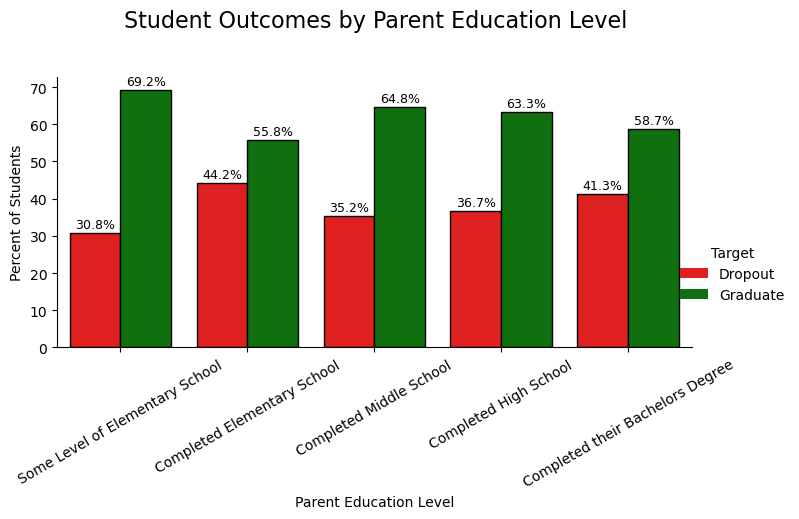

In [35]:
# Plotting
plot_bar(
    counts_target,
    x="Education Level",
    y="Percent",
    hue="Target",
    palette=OUTCOME_PALETTE,
    title="Student Outcomes by Parent Education Level",
    ylabel="Percent of Students",
    xlabel="Parent Education Level",
    show_values=True,
    percent=True,
    save_path=outputs_dir / "student_outcomes_by_parent_education.png"
)


### Dropout & Graduate Rates by Parent Education (Mother vs. Father)

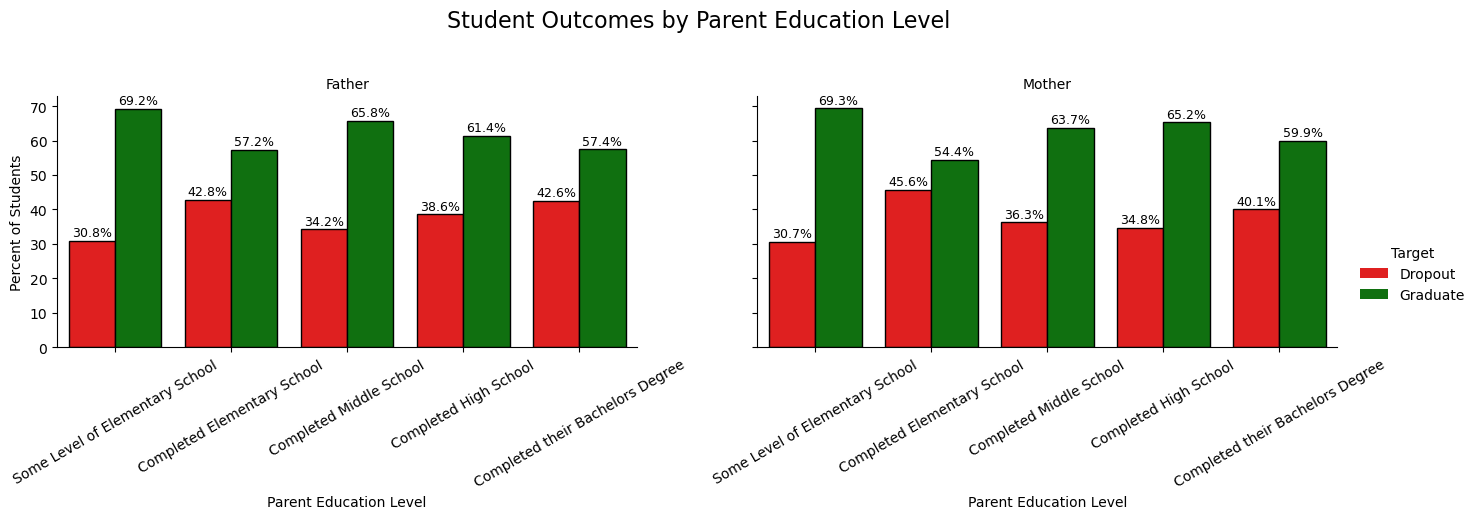

In [36]:
# Plotting
plot_bar(
    counts_target,
    x="Education Level",
    y="Percent",
    hue="Target",
    col="Parent",
    palette=OUTCOME_PALETTE,
    title="Student Outcomes by Parent Education Level",
    ylabel="Percent of Students",
    xlabel="Parent Education Level",
    show_values=True,
    percent=True,
    save_path=outputs_dir / "student_outcomes_by_mother_father_education.png"
)

### Mean and Median Age of Enrollment by Parent Education Level

In [37]:
# For both of the Figures

# Prepare long age DataFrame
long_age = make_long(clean_sd, "Age at enrollment")
long_age = long_age[long_age["Edu_code"].isin(EDU_LABELS.keys())]
long_age = map_and_order_edu(long_age, labels=EDU_LABELS, order=EDU_ORDER)

# Compute summary stats (returns long DataFrame with Statistic column mapped to "Mean"/"Median")
summary_age_hue = compute_summary_stats(long_age, "Age at enrollment")

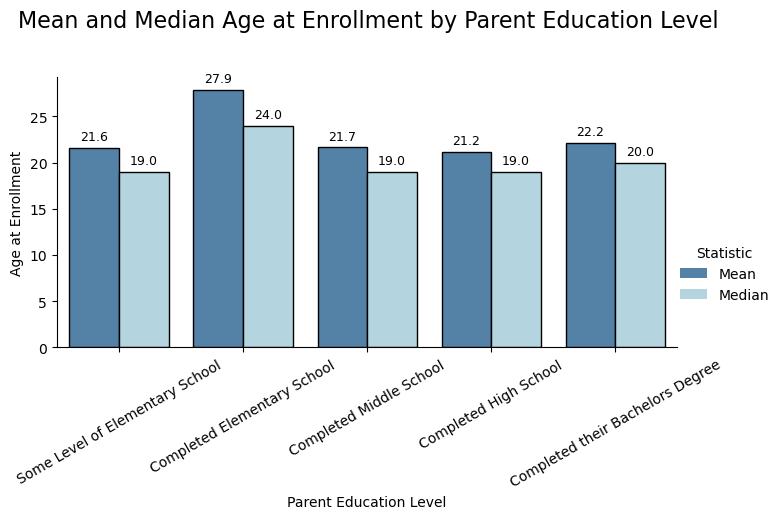

In [38]:
# Plotting
plot_bar(
    summary_age_hue,
    x="Education Level",
    y="Age at enrollment",
    hue="Statistic",
    palette=MEAN_MEDIAN_PALETTE,
    title="Mean and Median Age at Enrollment by Parent Education Level",
    ylabel="Age at Enrollment",
    xlabel="Parent Education Level",
    show_values=True,
    percent=False,
    save_path=outputs_dir / "mean_median_age_parent.png"
)

#### Mean and Median Age of Enrollment by Parent Education Level (Mother vs. Father) 

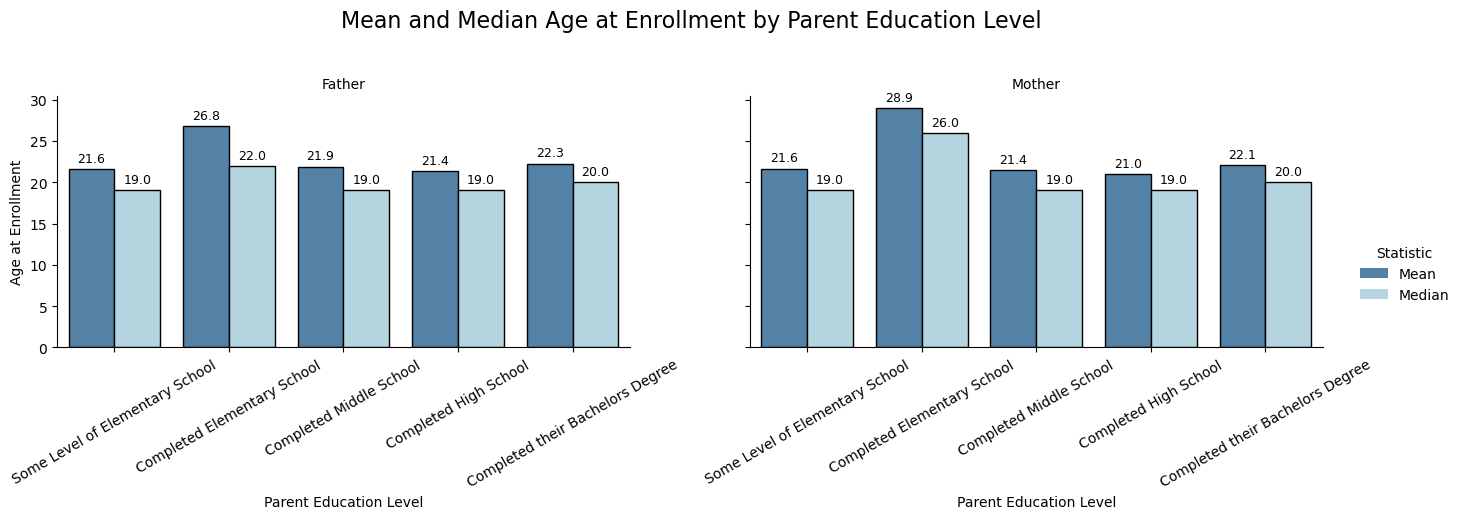

In [39]:
# Plotting
plot_bar(
    summary_age_hue,
    x="Education Level",
    y="Age at enrollment",
    hue="Statistic",
    col="Parent",
    palette=MEAN_MEDIAN_PALETTE,
    title="Mean and Median Age at Enrollment by Parent Education Level",
    ylabel="Age at Enrollment",
    xlabel="Parent Education Level",
    show_values=True,
    percent=False,
    save_path=outputs_dir / "mean_median_age_mother_father.png"
)

### Mean & Median Previous qualification (grade) by Parent Education Level

In [41]:
# Prepare long age DataFrame
long_grade = make_long(clean_sd, "Previous qualification (grade)")
long_grade = long_grade[long_grade["Edu_code"].isin(EDU_LABELS.keys())]
long_grade = map_and_order_edu(long_grade, labels=EDU_LABELS, order=EDU_ORDER)

# Compute summary stats (returns long DataFrame with Statistic column mapped to "Mean"/"Median")
summary_grade_hue = compute_summary_stats(long_grade, "Previous qualification (grade)")

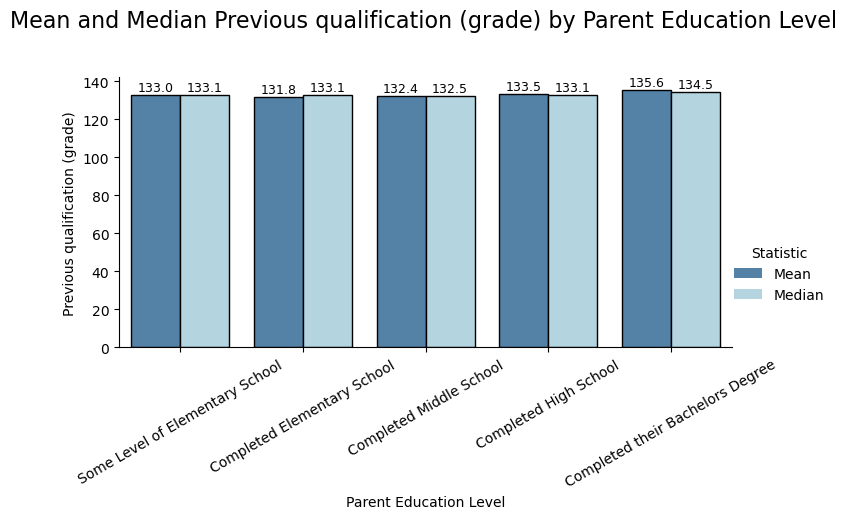

In [42]:
# Plotting
plot_bar(
    summary_grade_hue,
    x="Education Level",
    y="Previous qualification (grade)",
    hue="Statistic",
    palette=MEAN_MEDIAN_PALETTE,
    title="Mean and Median Previous qualification (grade) by Parent Education Level",
    ylabel="Previous qualification (grade)",
    xlabel="Parent Education Level",
    show_values=True,
    percent=False
    #save_path=outputs_dir / "mean_median_age_parent.png"
)

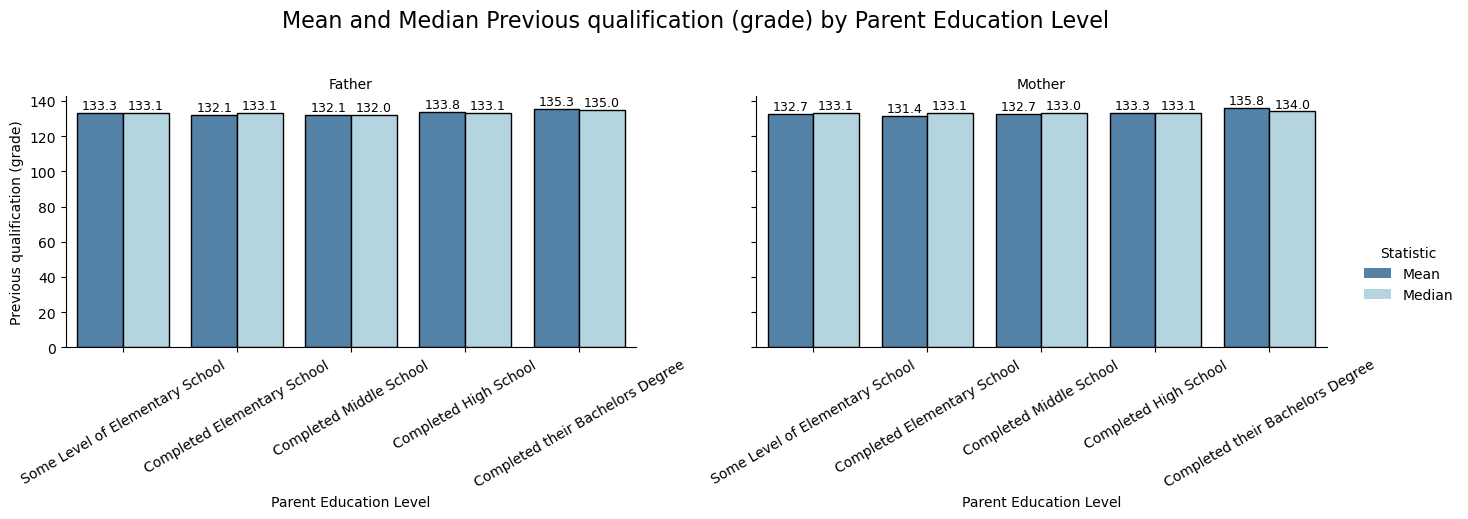

In [43]:
# Plotting
plot_bar(
    summary_grade_hue,
    x="Education Level",
    y="Previous qualification (grade)",
    hue="Statistic",
    col = "Parent",
    palette=MEAN_MEDIAN_PALETTE,
    title="Mean and Median Previous qualification (grade) by Parent Education Level",
    ylabel="Previous qualification (grade)",
    xlabel="Parent Education Level",
    show_values=True,
    percent=False
    #save_path=outputs_dir / "mean_median_age_parent.png"
)

In [44]:
# Now for Admission Grade

# Prepare long age DataFrame
long_grad = make_long(clean_sd, "Admission grade")
long_grad = long_grad[long_grad["Edu_code"].isin(EDU_LABELS.keys())]
long_grad = map_and_order_edu(long_grad, labels=EDU_LABELS, order=EDU_ORDER)

# Compute summary stats (returns long DataFrame with Statistic column mapped to "Mean"/"Median")
summary_grad_hue = compute_summary_stats(long_grad, "Admission grade")

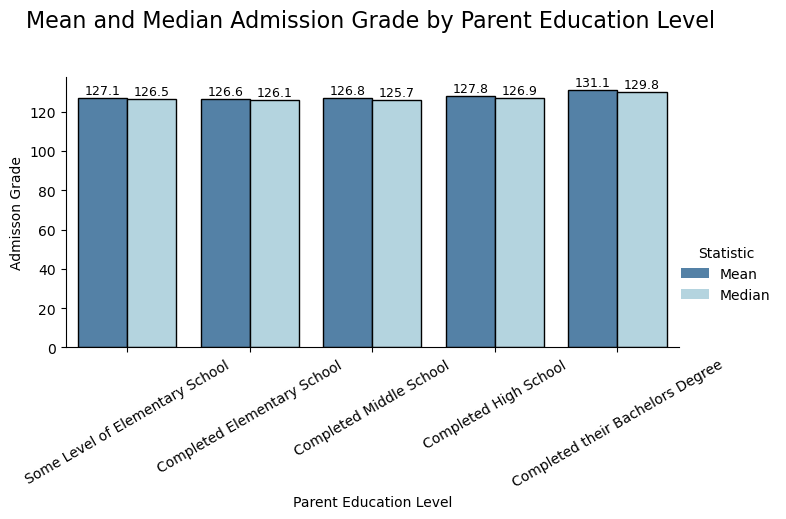

In [45]:
# Plotting
plot_bar(
    summary_grad_hue,
    x="Education Level",
    y="Admission grade",
    hue="Statistic",
    palette=MEAN_MEDIAN_PALETTE,
    title="Mean and Median Admission Grade by Parent Education Level",
    ylabel="Admisson Grade",
    xlabel="Parent Education Level",
    show_values=True,
    percent=False
    #save_path=outputs_dir / "mean_median_age_parent.png"
)

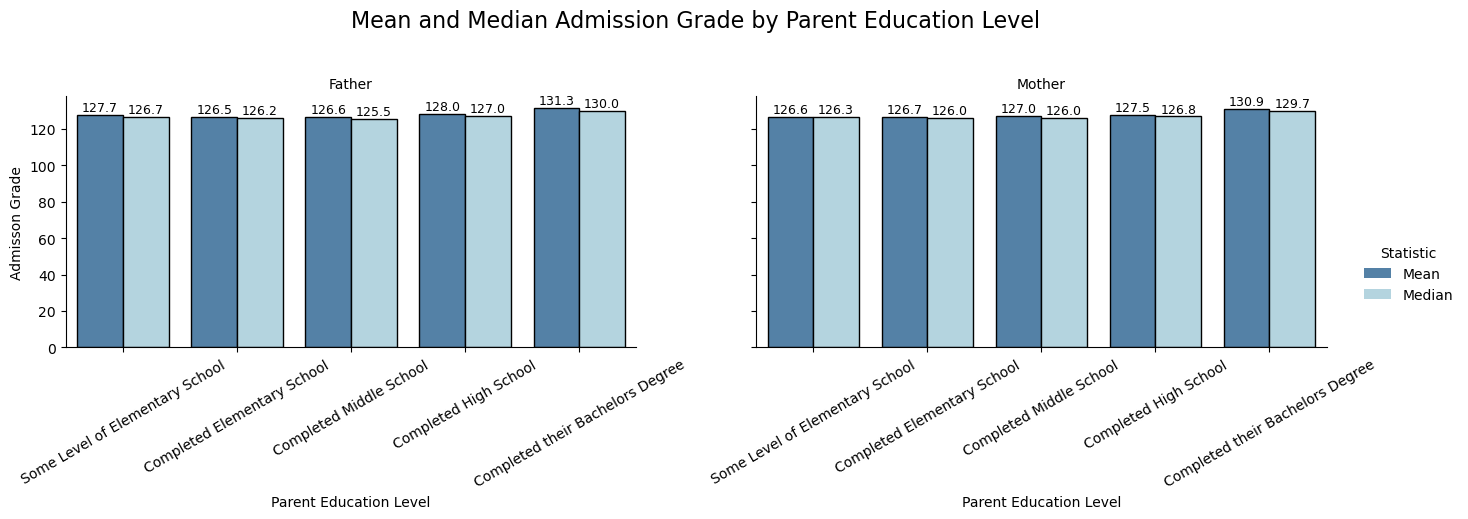

In [46]:
# Plotting
plot_bar(
    summary_grad_hue,
    x="Education Level",
    y="Admission grade",
    hue="Statistic",
    col = "Parent",
    palette=MEAN_MEDIAN_PALETTE,
    title="Mean and Median Admission Grade by Parent Education Level",
    ylabel="Admisson Grade",
    xlabel="Parent Education Level",
    show_values=True,
    percent=False
    #save_path=outputs_dir / "mean_median_age_parent.png"
)

### Scholarships Rates by Parent Education Level

In [47]:
# For Both of the Figures 

# Prepare long "Scholarship" DataFrame
long_scholarship = make_long(clean_sd, 'Scholarship holder')
long_scholarship = long_scholarship[
    (long_scholarship["Edu_code"].isin(EDU_LABELS.keys())) &
    (long_scholarship['Scholarship holder'].isin([0, 1]))
]
# Mapping the dataframe to the correct labels
long_scholarship = map_and_order_edu(long_scholarship, labels=EDU_LABELS, order=EDU_ORDER)

# Map 0/1 to readable labels
long_scholarship['Scholarship holder'] = long_scholarship['Scholarship holder'].map({
    0: "No Scholarship",
    1: "Scholarship"
})

# Computing the percentages for all of the bars
counts_scholarship = compute_percent(long_scholarship, target_col='Scholarship holder')

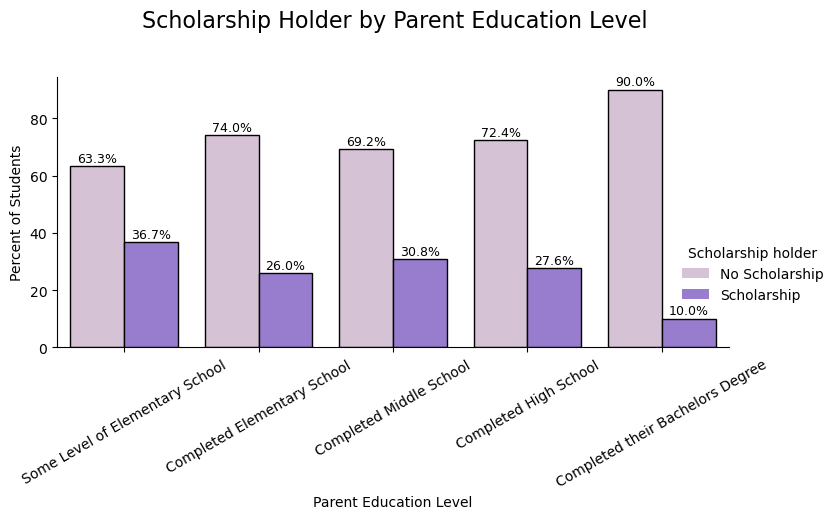

In [48]:
# Plotting
plot_bar(
    counts_scholarship,
    x="Education Level",
    y="Percent",
    hue='Scholarship holder',
    palette=SCHOLARSHIP_PALETTE,
    title="Scholarship Holder by Parent Education Level",
    ylabel="Percent of Students",
    xlabel="Parent Education Level",
    show_values=True,
    percent=True,
    save_path=outputs_dir / "scholarship_by_parent.png"
)


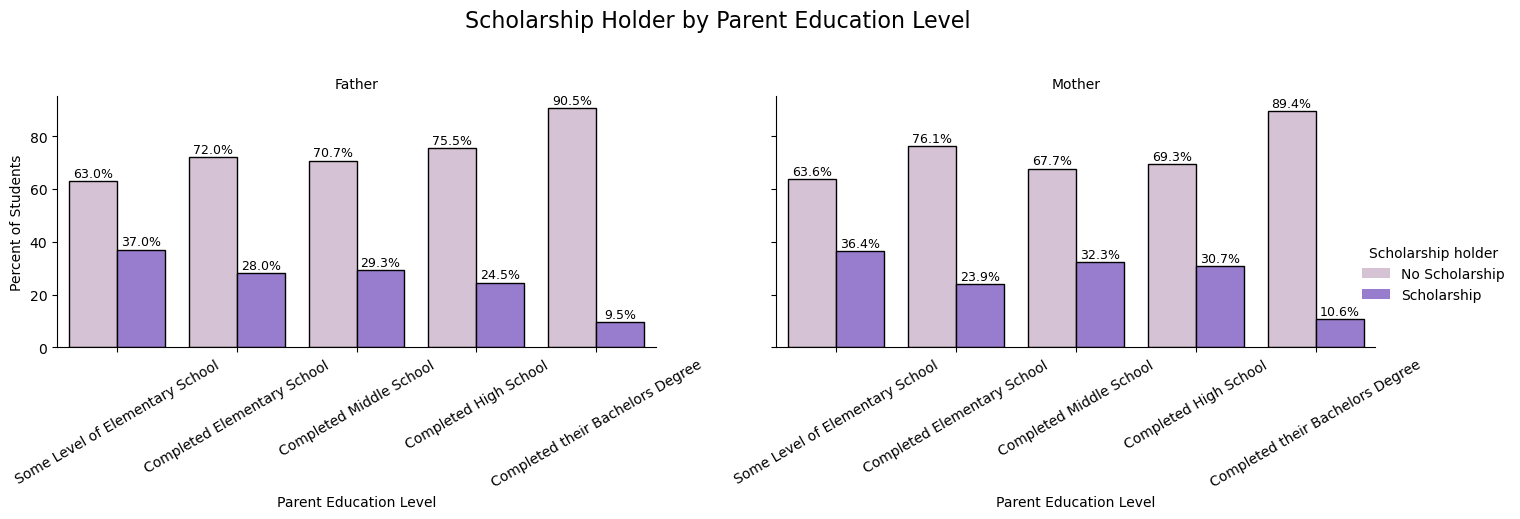

In [49]:
# Plotting
plot_bar(
    counts_scholarship,
    x="Education Level",
    y="Percent",
    hue='Scholarship holder',
    col = "Parent",
    palette=SCHOLARSHIP_PALETTE,
    title="Scholarship Holder by Parent Education Level",
    ylabel="Percent of Students",
    xlabel="Parent Education Level",
    show_values=True,
    percent=True,
    save_path=outputs_dir / "scholarship_by_mother_father.png"
)
